# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=1ff596421c1fb990a61f72161de9b8c5ea2e86d4a6ae63a66791a97b706ca6af
  Stored in directory: c:\users\ryan marshall\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys2 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
#Create Lists to store information from weather api request so that they can be plotted
lat = []
long = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
city_name = []

#Create base url for calling the open weather api
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"

#Create modified url with the desired units
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Loop through the cities and request weather data on each of them, saving the info we need
citynum = 1
for city in cities:
    response = requests.get(query_url + city).json()
    print(f"Getting the weather for city number {citynum}: {city}")
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        city_name.append(city)
    except (KeyError):
        print("Data not found for city {city}, skipping this one...")
    citynum += 1


Getting the weather for city number 1: hermanus
Getting the weather for city number 2: hobart
Getting the weather for city number 3: san miguelito
Getting the weather for city number 4: cape town
Getting the weather for city number 5: mataura
Getting the weather for city number 6: ushuaia
Getting the weather for city number 7: iqaluit
Getting the weather for city number 8: busselton
Getting the weather for city number 9: la peca
Getting the weather for city number 10: port hardy
Getting the weather for city number 11: kangaatsiaq
Getting the weather for city number 12: dunedin
Getting the weather for city number 13: atuona
Getting the weather for city number 14: saskylakh
Getting the weather for city number 15: yorkton
Getting the weather for city number 16: dodge city
Getting the weather for city number 17: kodiak
Getting the weather for city number 18: tiksi
Getting the weather for city number 19: barrow
Getting the weather for city number 20: kavieng
Getting the weather for city num

Getting the weather for city number 154: bhuj
Getting the weather for city number 155: cordoba
Getting the weather for city number 156: tanabe
Getting the weather for city number 157: san andres
Getting the weather for city number 158: victoria
Getting the weather for city number 159: barstow
Getting the weather for city number 160: chokurdakh
Getting the weather for city number 161: piney green
Getting the weather for city number 162: koumac
Getting the weather for city number 163: lake charles
Getting the weather for city number 164: wajima
Getting the weather for city number 165: grande-riviere
Data not found for city {city}, skipping this one...
Getting the weather for city number 166: stornoway
Getting the weather for city number 167: saint-philippe
Getting the weather for city number 168: bermejo
Getting the weather for city number 169: illoqqortoormiut
Data not found for city {city}, skipping this one...
Getting the weather for city number 170: clyde river
Getting the weather fo

Getting the weather for city number 307: price
Getting the weather for city number 308: rio gallegos
Getting the weather for city number 309: provideniya
Getting the weather for city number 310: pochutla
Getting the weather for city number 311: santa cruz
Getting the weather for city number 312: paraiso
Getting the weather for city number 313: sao joao da barra
Getting the weather for city number 314: touros
Getting the weather for city number 315: pimenta bueno
Getting the weather for city number 316: langsa
Getting the weather for city number 317: emba
Getting the weather for city number 318: rungata
Data not found for city {city}, skipping this one...
Getting the weather for city number 319: toliary
Data not found for city {city}, skipping this one...
Getting the weather for city number 320: bucak
Getting the weather for city number 321: binzhou
Getting the weather for city number 322: belmonte
Getting the weather for city number 323: mykolayivka
Getting the weather for city number 

Getting the weather for city number 461: itaituba
Getting the weather for city number 462: flin flon
Getting the weather for city number 463: bandarbeyla
Getting the weather for city number 464: nevelsk
Getting the weather for city number 465: capela
Getting the weather for city number 466: biltine
Getting the weather for city number 467: churapcha
Getting the weather for city number 468: beloha
Getting the weather for city number 469: asyut
Getting the weather for city number 470: grand-santi
Getting the weather for city number 471: lincoln
Getting the weather for city number 472: temiscaming
Getting the weather for city number 473: waddan
Getting the weather for city number 474: barcelona
Getting the weather for city number 475: camacha
Getting the weather for city number 476: jamame
Getting the weather for city number 477: hokitika
Getting the weather for city number 478: williams lake
Getting the weather for city number 479: gidam
Getting the weather for city number 480: aguas form

Getting the weather for city number 608: thunder bay
Getting the weather for city number 609: bowmore
Getting the weather for city number 610: antofagasta
Getting the weather for city number 611: ust-bolsheretsk
Data not found for city {city}, skipping this one...
Getting the weather for city number 612: zhangjiakou
Getting the weather for city number 613: scalloway
Data not found for city {city}, skipping this one...
Getting the weather for city number 614: anadyr
Getting the weather for city number 615: togur
Getting the weather for city number 616: ipanguacu
Getting the weather for city number 617: yar-sale
Getting the weather for city number 618: springbok
Getting the weather for city number 619: san mateo
Getting the weather for city number 620: dubai
Getting the weather for city number 621: urucara
Getting the weather for city number 622: karaton
Getting the weather for city number 623: sovetskiy
Getting the weather for city number 624: biograd na moru
Getting the weather for cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
city_weather_df = pd.DataFrame({"City": city_name, "Latitude": lat, "Longitude": long, "Temperature": temperature, 
                                "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": windspeed})
city_weather_df.to_csv(r'..\output_data\CityWeather.csv', index = False)
city_weather_df.head(10)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,hermanus,-34.4187,19.2345,67.80,80,12,17.20
1,hobart,-42.8794,147.3294,49.50,74,100,9.22
2,san miguelito,9.0333,-79.5000,85.21,75,40,11.50
3,cape town,-33.9258,18.4232,65.55,76,15,18.01
4,mataura,-46.1927,168.8643,50.65,96,100,7.45
5,ushuaia,-54.8000,-68.3000,47.86,76,75,25.32
6,iqaluit,63.7506,-68.5145,31.69,84,99,15.01
7,busselton,-33.6500,115.3333,55.26,90,97,8.37
8,la peca,-5.6111,-78.4350,73.24,84,100,3.36
9,port hardy,50.6996,-127.4199,45.07,80,83,9.89


In [32]:
#Find the number of entries in the dataframe
number_of_cities = city_weather_df["City"].count()
number_of_cities

585

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
#Determine if there are any cities with humidity above 100
for x in range(0,number_of_cities):
    if(city_weather_df.iloc[x,4] > 100):
        print(f"The city {city_weather_df.iloc[x,0]} has humidity above 100.")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

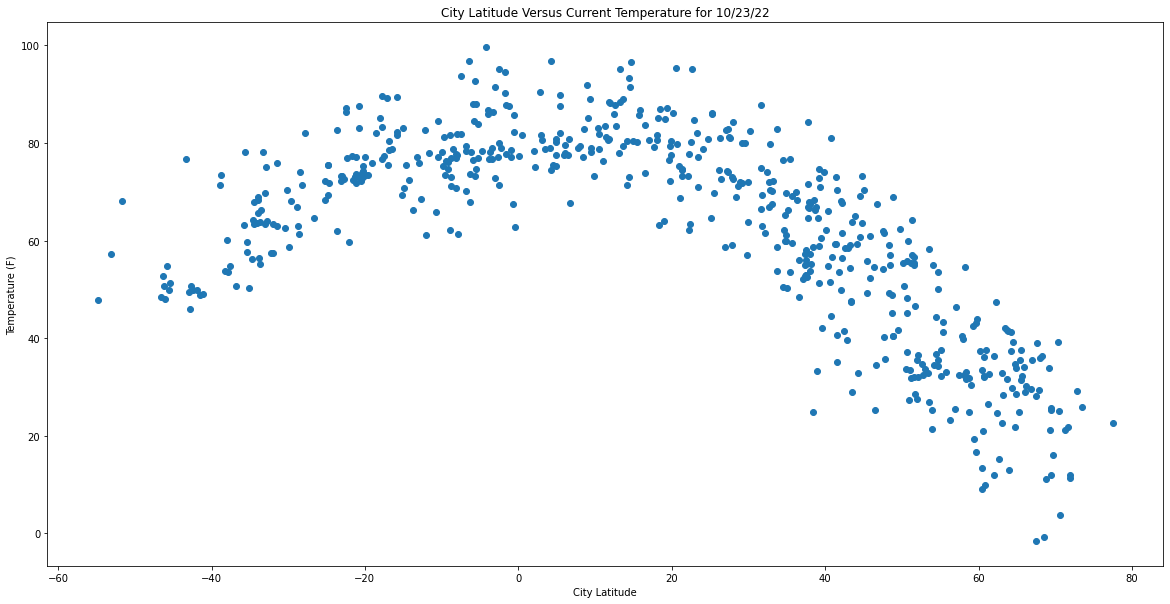

In [38]:
#Create a Plot of Latitude versus Temperature

#Create the x and y axis
latitude_axis = city_weather_df["Latitude"]
temperature_axis = city_weather_df["Temperature"]

#Create the plot
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, temperature_axis, marker="o")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Temperature for 10/23/22")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.show()


In the plot of latitude versus temperature shown above, you can clearly see the temperature gets higher the closer the city is located to the equator and lower the farther away a city is from the equator.

## Latitude vs. Humidity Plot

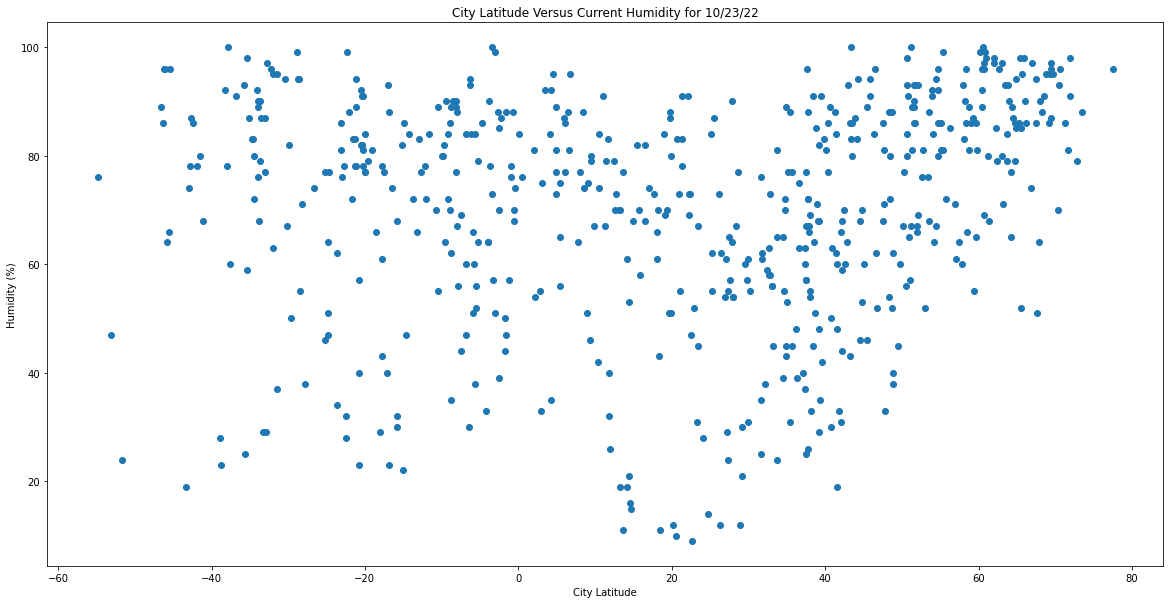

In [39]:
#Create a Plot of Latitude versus Humidity

#Create the y axis
humidity_axis = city_weather_df["Humidity"]

#Create the plot
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, humidity_axis, marker="o")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Humidity for 10/23/22")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The plot of city latitude versus humidity shown above does not indicate that there is a relationship between how far a city is from the equator to the humidity it is currently experiencing. The data seems pretty spread out. There do seem to be more cities with a humidity above 50% than below, however, indicating that there a more cities in our dataset with high humidity than low.

## Latitude vs. Cloudiness Plot

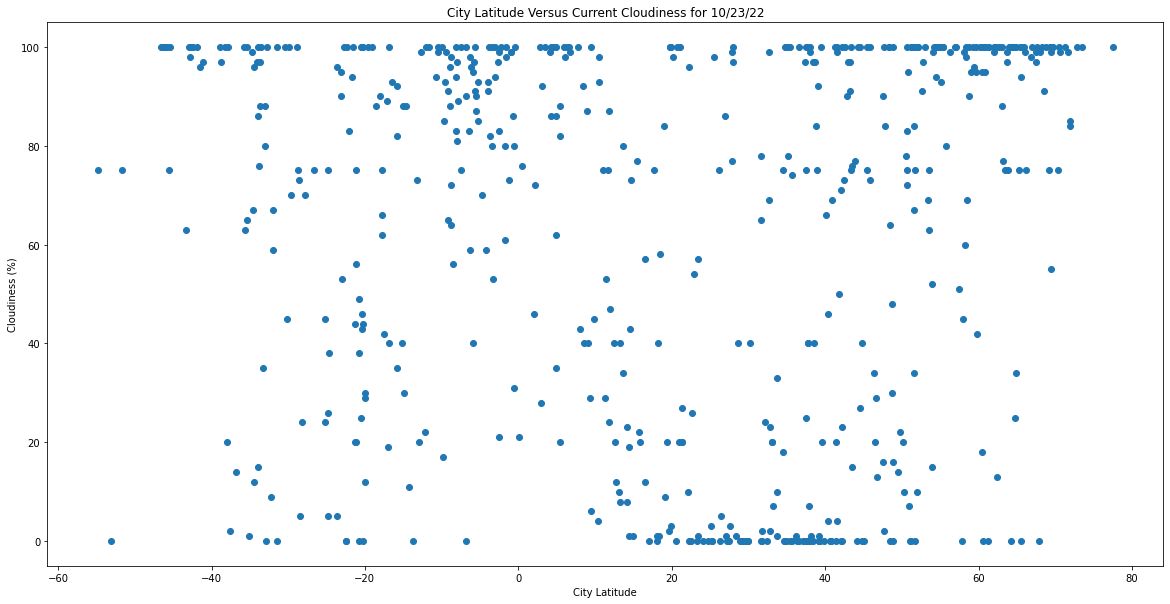

In [41]:
#Create a Plot of Latitude versus Cloudiness

#Create the y axis
cloudiness_axis = city_weather_df["Cloudiness"]

#Create the plot
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, cloudiness_axis, marker="o")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Cloudiness for 10/23/22")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

In the plot shown above of city latitude versus current cloudiness, there seems to be a high number of cities with either 100% cloudiness or 0% cloudiness. This seems to indicate that total cloud cover or no clouds at all seem to be more likely conditions than otherwise. It seems that it's more likely for cities in the norther hemisphere to 0% cloudiness currently.

## Latitude vs. Wind Speed Plot

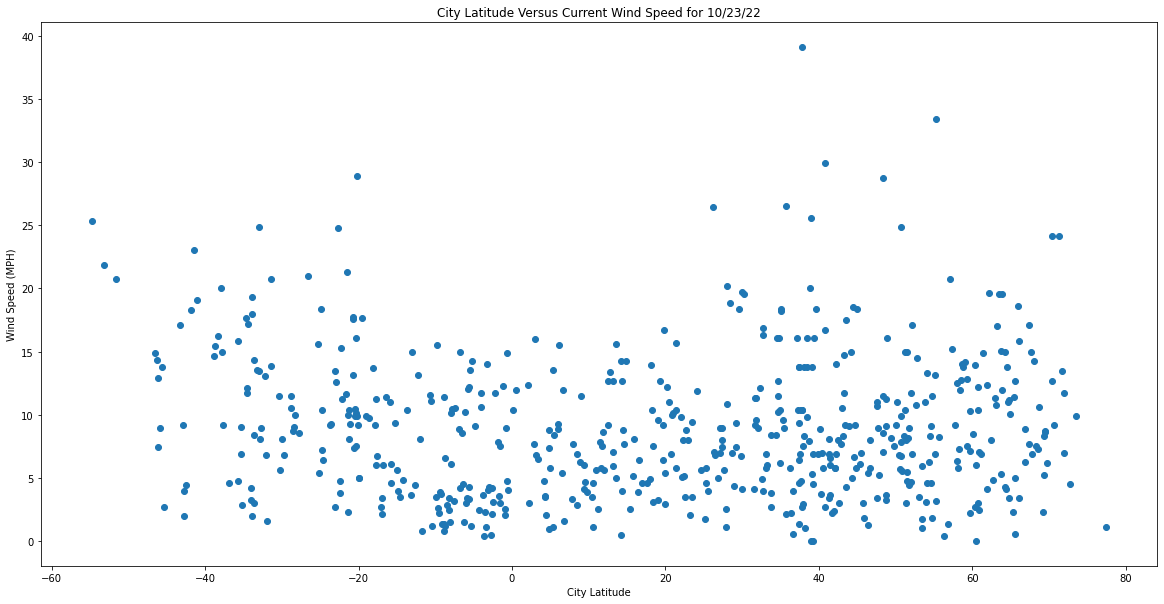

In [42]:
#Create a Plot of Latitude versus Wind Speed

#Create the y axis
windspeed_axis = city_weather_df["Wind Speed"]

#Create the plot
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, windspeed_axis, marker="o")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Wind Speed for 10/23/22")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.show()

In the plot shown above of city latitude versus wind speed, there doesn't seem to be a strong correlation between a city's location and the current wind. There is definitely a much higher number of cities with wind speed less than 15 mph than those above.

## Linear Regression

In [56]:
#Determine which cities are in the Northern Hemisphere and which are in the Southern Hemisphere

#Create empty lists to store city data for nothern hemisphere and southern hemisphere dataframes
northern_city = []
northern_lat = []
northern_long = []
northern_temp = []
northern_humidity = []
northern_cloudiness = []
northern_windspeed = []

southern_city = []
southern_lat = []
southern_long = []
southern_temp = []
southern_humidity = []
southern_cloudiness = []
southern_windspeed = []


#Loop through the previous dataframe and sort the cities into their corresponding hemisphere's dataframe
for x in range(0,number_of_cities):
    if(city_weather_df.iloc[x,1] > 0):
        northern_city.append(city_weather_df.iloc[x,0])
        northern_lat.append(city_weather_df.iloc[x,1])
        northern_long.append(city_weather_df.iloc[x,2])
        northern_temp.append(city_weather_df.iloc[x,3])
        northern_humidity.append(city_weather_df.iloc[x,4])
        northern_cloudiness.append(city_weather_df.iloc[x,5])
        northern_windspeed.append(city_weather_df.iloc[x,6])
    else:
        southern_city.append(city_weather_df.iloc[x,0])
        southern_lat.append(city_weather_df.iloc[x,1])
        southern_long.append(city_weather_df.iloc[x,2])
        southern_temp.append(city_weather_df.iloc[x,3])
        southern_humidity.append(city_weather_df.iloc[x,4])
        southern_cloudiness.append(city_weather_df.iloc[x,5])
        southern_windspeed.append(city_weather_df.iloc[x,6])
        
#Create dataframes to store cities as either Northern or Southern cities
city_weather_northern_df = pd.DataFrame({"City": northern_city, "Latitude": northern_lat, "Longitude": northern_long, 
                                         "Temperature": northern_temp, "Humidity": northern_humidity, "Cloudiness": northern_cloudiness,
                                         "Wind Speed": northern_windspeed})
city_weather_southern_df = pd.DataFrame({"City": southern_city, "Latitude": southern_lat, "Longitude": southern_long,
                                         "Temperature": southern_temp, "Humidity": southern_humidity, "Cloudiness": southern_cloudiness,
                                         "Wind Speed": southern_windspeed})

    

In [57]:
#Show top of northern hemisphere dataframe
city_weather_northern_df.head(10)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,san miguelito,9.0333,-79.5000,85.21,75,40,11.50
1,iqaluit,63.7506,-68.5145,31.69,84,99,15.01
2,port hardy,50.6996,-127.4199,45.07,80,83,9.89
3,kangaatsiaq,68.3065,-53.4641,36.30,88,100,7.52
4,saskylakh,71.9167,114.0833,11.34,98,85,6.96
5,yorkton,51.2167,-102.4677,31.84,100,100,14.97
6,dodge city,37.7528,-100.0171,84.36,26,0,39.12
7,kodiak,57.7900,-152.4072,40.51,60,0,9.22
8,tiksi,71.6872,128.8694,21.69,81,99,13.47
9,barrow,71.2906,-156.7887,21.22,86,100,24.16


In [58]:
#Show top of southern hemisphere dataframe
city_weather_southern_df.head(10)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,hermanus,-34.4187,19.2345,67.80,80,12,17.20
1,hobart,-42.8794,147.3294,49.50,74,100,9.22
2,cape town,-33.9258,18.4232,65.55,76,15,18.01
3,mataura,-46.1927,168.8643,50.65,96,100,7.45
4,ushuaia,-54.8000,-68.3000,47.86,76,75,25.32
5,busselton,-33.6500,115.3333,55.26,90,97,8.37
6,la peca,-5.6111,-78.4350,73.24,84,100,3.36
7,dunedin,-45.8742,170.5036,54.88,64,100,8.95
8,atuona,-9.8000,-139.0333,75.33,80,17,15.55
9,kavieng,-2.5744,150.7967,80.10,70,21,2.15


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8746


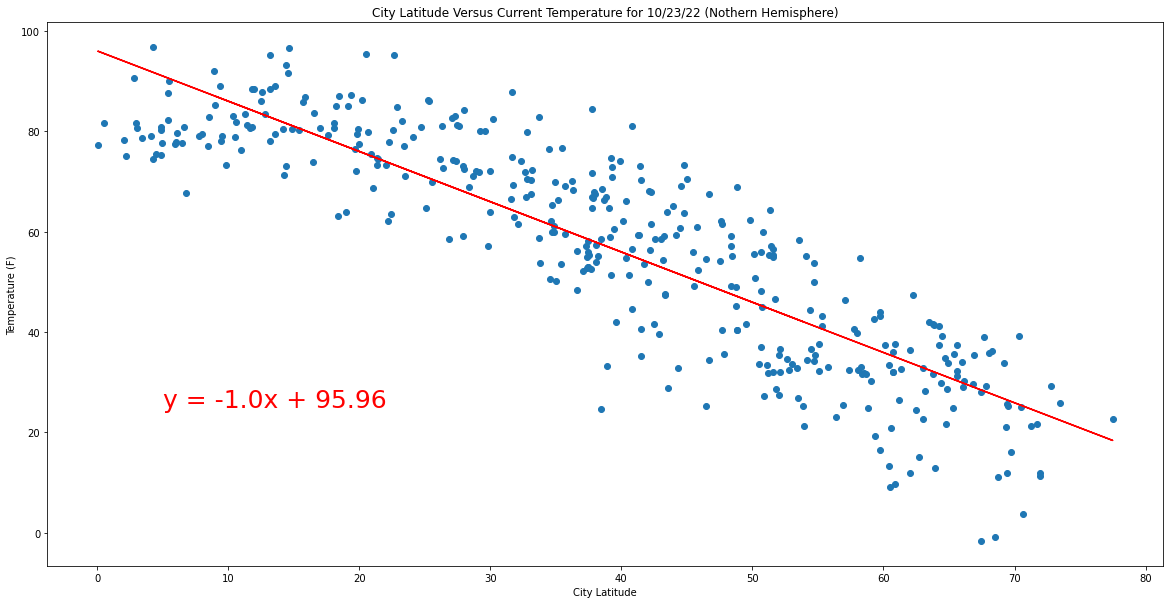

In [65]:
#Create a Plot of Latitude versus Temperature for Northern Hemisphere Cities

#Create the x and y axis
latitude_axis = city_weather_northern_df["Latitude"]
temperature_axis = city_weather_northern_df["Temperature"]

#Create the plot and include linear regression
correlation = st.pearsonr(latitude_axis, temperature_axis)
print(f"The r-value is: {round(correlation[0],4)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_axis, temperature_axis)
regress_values = latitude_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, temperature_axis, marker="o")
plt.plot(latitude_axis, regress_values, "r-")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Temperature for 10/23/22 (Nothern Hemisphere)")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq,(5,25),fontsize=25,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7306


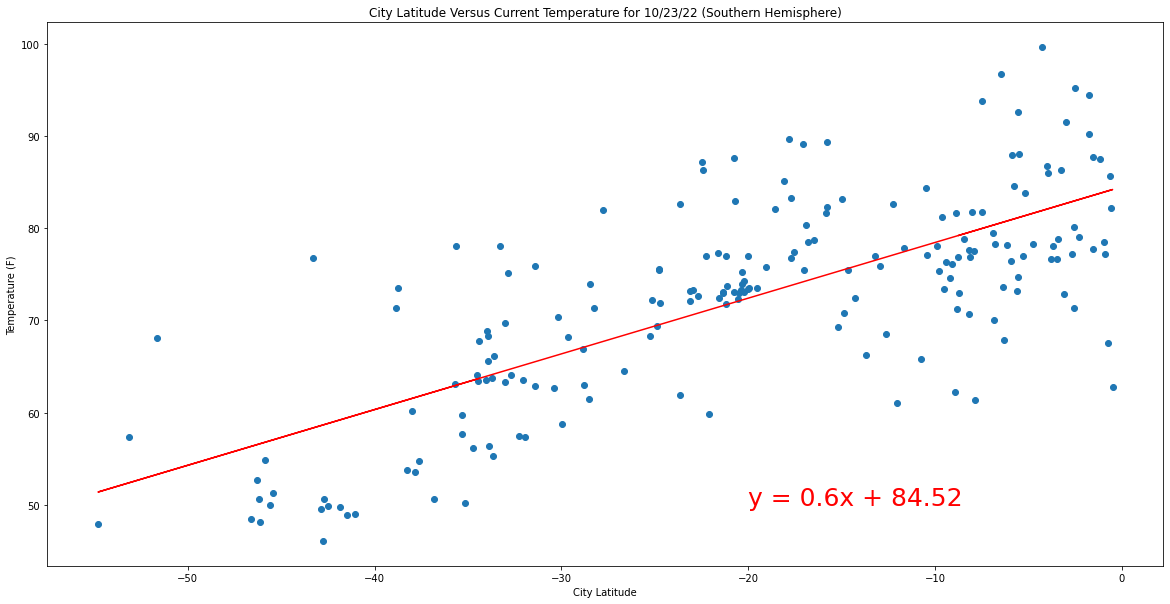

In [67]:
#Create a Plot of Latitude versus Temperature for Southern Hemisphere Cities

#Create the x and y axis
latitude_axis = city_weather_southern_df["Latitude"]
temperature_axis = city_weather_southern_df["Temperature"]

#Create the plot and include linear regression
correlation = st.pearsonr(latitude_axis, temperature_axis)
print(f"The r-value is: {round(correlation[0],4)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_axis, temperature_axis)
regress_values = latitude_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, temperature_axis, marker="o")
plt.plot(latitude_axis, regress_values, "r-")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Temperature for 10/23/22 (Southern Hemisphere)")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq,(-20,50),fontsize=25,color="red")
plt.show()

The two plots above show a strong negative correlation for the northern hemisphere and a strong positive correlation for the southern hemisphere. This indicates that the data shows higher temperatures for each hemisphere the closer the latitude is to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3715


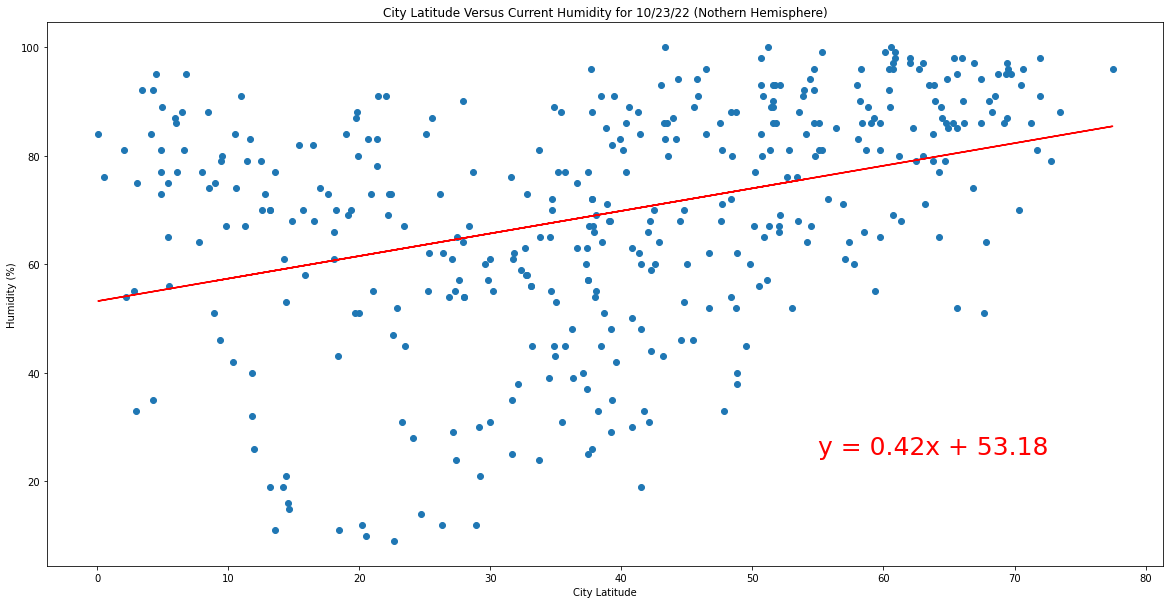

In [69]:
#Create a Plot of Latitude versus Humidity for Northern Hemisphere Cities

#Create the x and y axis
latitude_axis = city_weather_northern_df["Latitude"]
humidity_axis = city_weather_northern_df["Humidity"]

#Create the plot and include linear regression
correlation = st.pearsonr(latitude_axis, humidity_axis)
print(f"The r-value is: {round(correlation[0],4)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_axis, humidity_axis)
regress_values = latitude_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, humidity_axis, marker="o")
plt.plot(latitude_axis, regress_values, "r-")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Humidity for 10/23/22 (Nothern Hemisphere)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(55,25),fontsize=25,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.0562


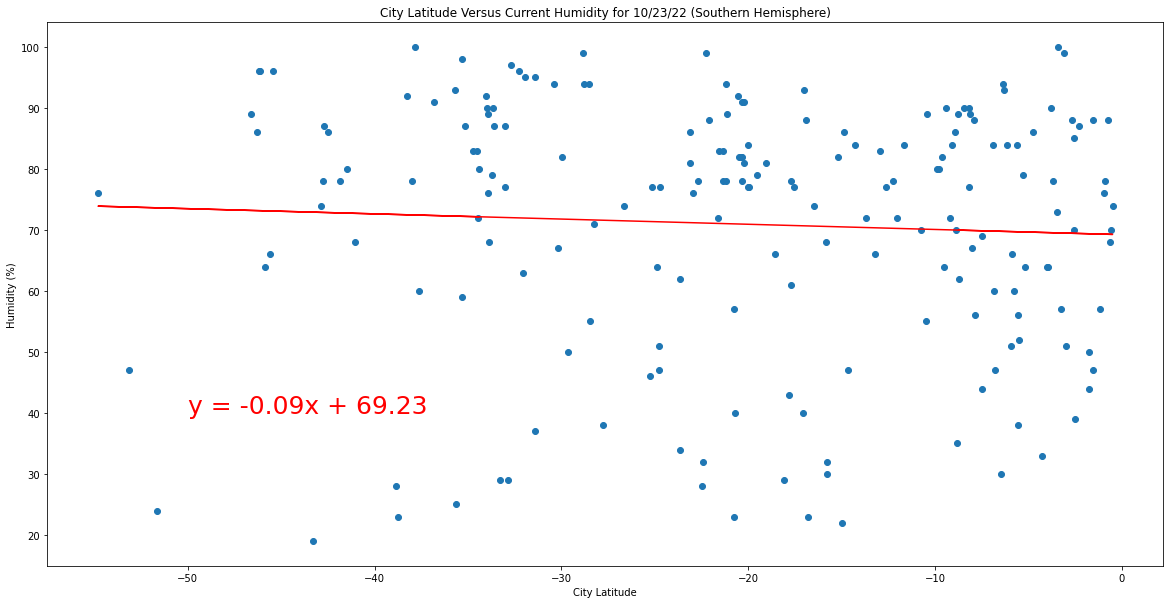

In [71]:
#Create a Plot of Latitude versus Humidity for Southern Hemisphere Cities

#Create the x and y axis
latitude_axis = city_weather_southern_df["Latitude"]
humidity_axis = city_weather_southern_df["Humidity"]

#Create the plot and include linear regression
correlation = st.pearsonr(latitude_axis, humidity_axis)
print(f"The r-value is: {round(correlation[0],4)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_axis, humidity_axis)
regress_values = latitude_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, humidity_axis, marker="o")
plt.plot(latitude_axis, regress_values, "r-")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Humidity for 10/23/22 (Southern Hemisphere)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-50,40),fontsize=25,color="red")
plt.show()

The two plots above show that there is not a strong correlation between latitude and humidity in either the northern or southern hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2884


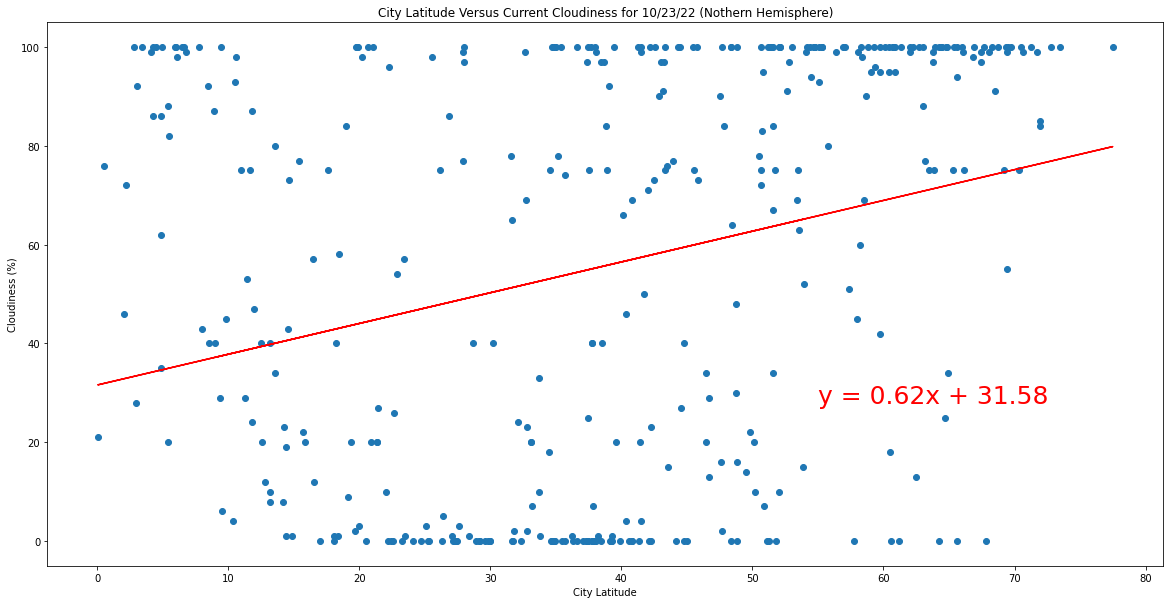

In [73]:
#Create a Plot of Latitude versus Cloudiness for Northern Hemisphere Cities

#Create the x and y axis
latitude_axis = city_weather_northern_df["Latitude"]
cloudiness_axis = city_weather_northern_df["Cloudiness"]

#Create the plot and include linear regression
correlation = st.pearsonr(latitude_axis, cloudiness_axis)
print(f"The r-value is: {round(correlation[0],4)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_axis, cloudiness_axis)
regress_values = latitude_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, cloudiness_axis, marker="o")
plt.plot(latitude_axis, regress_values, "r-")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Cloudiness for 10/23/22 (Nothern Hemisphere)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(55,28),fontsize=25,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0938


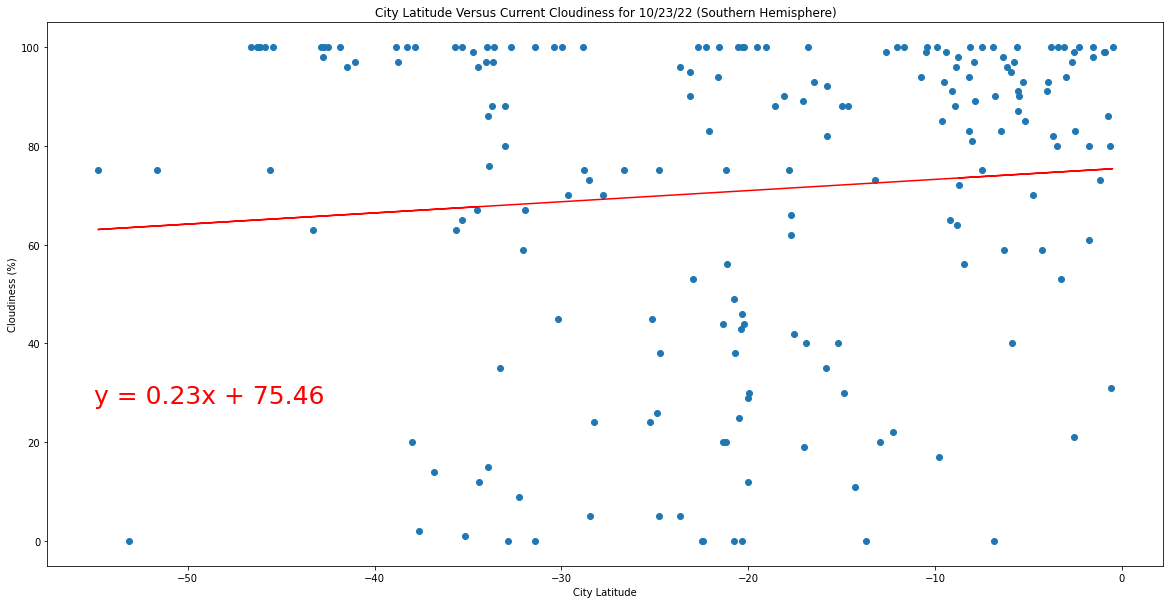

In [74]:
#Create a Plot of Latitude versus Cloudiness for Southern Hemisphere Cities

#Create the x and y axis
latitude_axis = city_weather_southern_df["Latitude"]
cloudiness_axis = city_weather_southern_df["Cloudiness"]

#Create the plot and include linear regression
correlation = st.pearsonr(latitude_axis, cloudiness_axis)
print(f"The r-value is: {round(correlation[0],4)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_axis, cloudiness_axis)
regress_values = latitude_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, cloudiness_axis, marker="o")
plt.plot(latitude_axis, regress_values, "r-")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Cloudiness for 10/23/22 (Southern Hemisphere)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-55,28),fontsize=25,color="red")
plt.show()

The two plots above show that there is not a strong correlation between latitude and cloudiness in either the northern or southern hemispheres. There is a slight indication that the farther a city is from the equator in the northern hemisphere, the greater amount of cloud cover it experiences, but it's not a particularly strong correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1303


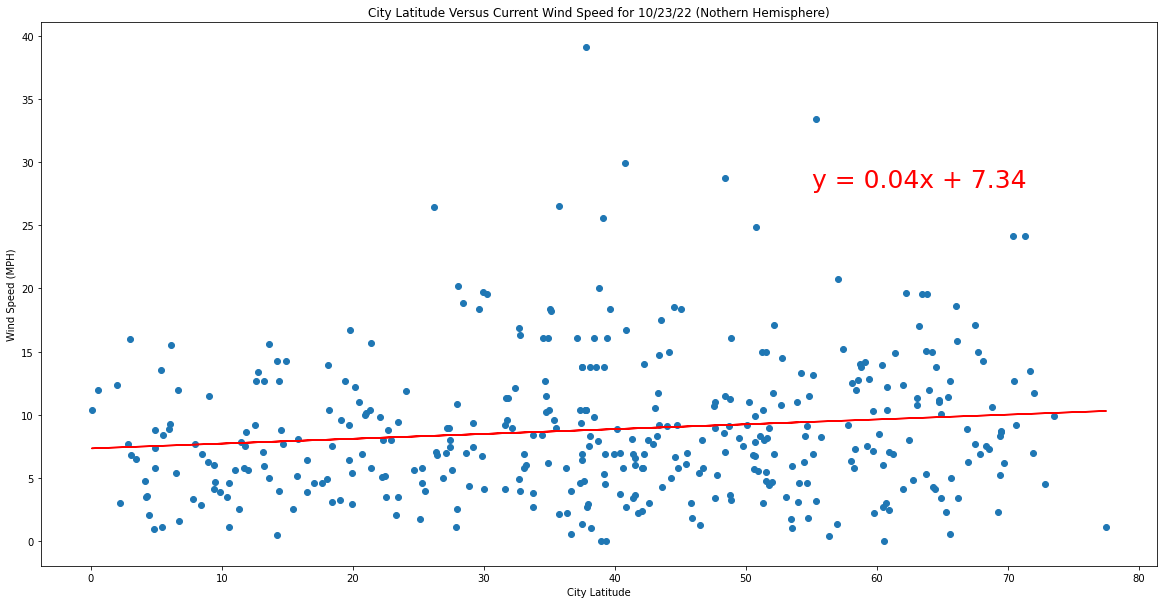

In [75]:
#Create a Plot of Latitude versus Cloudiness for Northern Hemisphere Cities

#Create the x and y axis
latitude_axis = city_weather_northern_df["Latitude"]
windspeed_axis = city_weather_northern_df["Wind Speed"]

#Create the plot and include linear regression
correlation = st.pearsonr(latitude_axis, windspeed_axis)
print(f"The r-value is: {round(correlation[0],4)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_axis, windspeed_axis)
regress_values = latitude_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, windspeed_axis, marker="o")
plt.plot(latitude_axis, regress_values, "r-")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Wind Speed for 10/23/22 (Nothern Hemisphere)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.annotate(line_eq,(55,28),fontsize=25,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4343


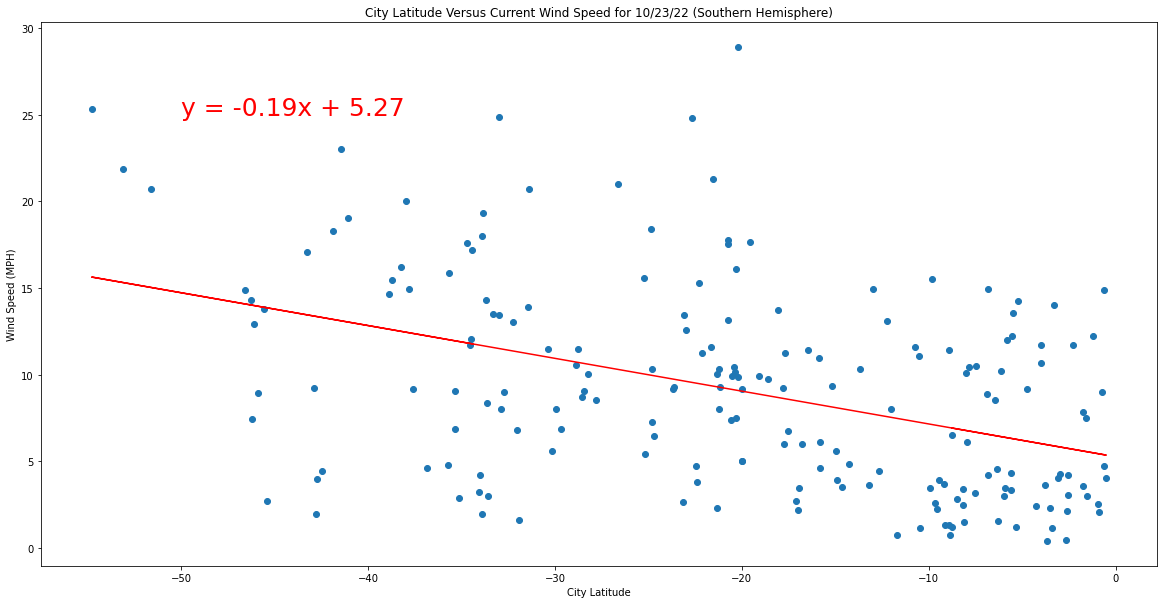

In [77]:
#Create a Plot of Latitude versus Cloudiness for Southern Hemisphere Cities

#Create the x and y axis
latitude_axis = city_weather_southern_df["Latitude"]
windspeed_axis = city_weather_southern_df["Wind Speed"]

#Create the plot and include linear regression
correlation = st.pearsonr(latitude_axis, windspeed_axis)
print(f"The r-value is: {round(correlation[0],4)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(latitude_axis, windspeed_axis)
regress_values = latitude_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(latitude_axis, windspeed_axis, marker="o")
plt.plot(latitude_axis, regress_values, "r-")

#Create the Title and labels for the plot
plt.title("City Latitude Versus Current Wind Speed for 10/23/22 (Southern Hemisphere)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.annotate(line_eq,(-50,25),fontsize=25,color="red")
plt.show()

In the plots above, we see that there is no strong correlation between latitude and wind speed for the northern hemisphere. In the southern hemisphere, however, there does seem to be a medium-strong correlation that the closer a city is to the equator the lower the wind speed.